In [1]:
!pip install networkx

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import cvxpy as cp
import numpy as np

# Unidad II Optimización Combinatoria

**Instrucciones:**

Resuelva los siguientes actividades para las cuales deberá presentar:

- Los modelos planteados

- Las gráficas que se piden

- Evidencia de los códigos del software utilizado

1. Considere el problema:

$$
\begin{align*}
\text{max }z&=5x_1 + x_2\\
\text{sujeto a:}&\\
-x_1+2x_2 &\leq 4\\
x_1-x_2 &\leq 1\\
4x_1+x_2 &\leq 12\\
x_1,x_2&\in\mathbb{Z}^{+}
\end{align*}
$$

a) Plantee y resuelva el modelo de la relajación lineal de este problema. A partir de la solución de la relajación ¿Qué podría decir de la solución del problema entero?

Los problemas de programación entera son un tipo de problema de optimización en el que algunas o todas las variables de decisión deben tomar valores enteros. Resolver problemas de Programación Entera puede ser computacionalmente costoso, y no todos los métodos de optimización tradicionales son aplicables a este tipo de problemas.

Una técnica común para abordar estos problemas es la relajación lineal, que consiste en relajar las restricciones de enteros, permitiendo que las variables tomen valores continuos. Esto transforma el problema en uno de programación lineal. La solución óptima de la relajación lineal proporciona una cota inferior (en problemas de minimización) o una cota superior (en problemas de maximización) para el valor óptimo del problema original de programación entera.

Es importante recordar que la solución de la relajación lineal no siempre es factible para el problema original, ya que puede incluir valores no enteros. A pesar de esto, la relajación lineal es una herramienta valiosa, ya que proporciona información útil para guiar algoritmos más avanzados, como los métodos de ramificación y acotamiento (branch and bound) que buscan encontrar soluciones enteras factibles y óptimas.

### Relajación lineal del problema:

La relajación lineal se obtiene eliminando la restricción sobre $x_1,x_2$ de pertenecer a los enteros positivos ($\mathbb{Z}^{+}$), es decir:

$$
\begin{align*}
\text{max }z&=5x_1 + x_2\\
\text{sujeto a:}&\\
-x_1+2x_2 &\leq 4\\
x_1-x_2 &\leq 1\\
4x_1+x_2 &\leq 12\\
x_1,x_2&\geq0
\end{align*}
$$

Este es el problema que resolveremos utilizando `cvxpy`:

In [3]:
x = cp.Variable(shape=(2, 1), name="x")
# funcion objetivo
obj = cp.Maximize(5 * x[0] + x[1])

# restricciones
constraints = [-x[0] + 2 * x[1] <= 4,
               x[0] - x[1] <= 1,
               4 * x[0] + x[1] <= 12,
               x[0] >= 0, # relajacion lineal
               x[1] >= 0] # relajacion lineal

problem = cp.Problem(obj, constraints)

# Resolviendo
problem.solve()
print('Solución del problema (relajación lineal):')
print('x1:', x[0].value)
print('x2:', x[1].value)
print('Valor óptimo de z:', problem.value)

Solución del problema (relajación lineal):
x1: [2.6]
x2: [1.6]
Valor óptimo de z: 14.599999997192235


Hemos encontrado la solución en el punto $(2.6, 1.6)$ donde la función alcanza el valor máximo de $14.59999$, si graficamos la región factible y las curvas de nivel podremos ver a qué vértice se refiere la solución

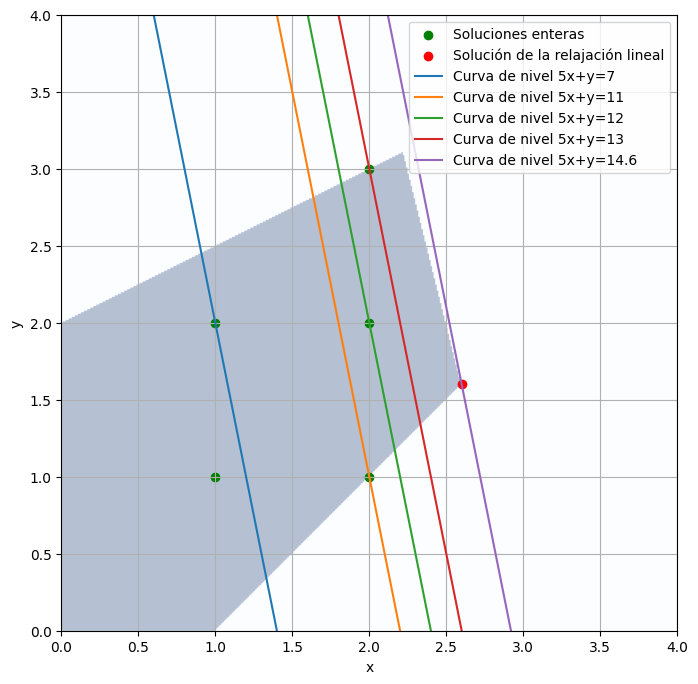

In [4]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
# Crear una malla de puntos
X, Y = np.meshgrid(x, y)

# restricción 1
r1 = (-X + 2 * Y <= 4)
# restricción 2
r2 = (X - Y <= 1)
# restriccion 3
r3 = (4 * X + Y <= 12)
# restriccion 4
r4 = (X >= 0)
# restriccion 5
r5 = (Y >= 0)

region = r1 & r2 & r3 & r4 & r5
plot_fun = True
plt.figure(figsize=(8, 8))
plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Blues", alpha=0.3)
puntos_dentro = [(1, 1), (2, 1), (1, 2), (2, 2), (2,3)]
plt.scatter(*zip(*puntos_dentro), color='green', marker='o', label='Soluciones enteras')
plt.scatter(*zip(*[(2.6, 1.6)]), color='red', marker='o', label='Solución de la relajación lineal')

if plot_fun:
  for i in [7, 11, 12, 13, 14.6]:
    plt.plot(x, (i - 5*x), label=f"Curva de nivel 5x+y={i}")
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.title("")
plt.grid(True)
plt.show()

Como esperábamos, la solución de la relajación lineal no es una solución
entera, no obstante esta solución proporciona un límite superior para
el valor óptimo del problema entero.

Con el método gráfico, nos hemos permitido graficar diferentes curvas de nivel y graficar todos los puntos que caigan en la región factible, esto ya nos da una idea intuitiva de qué puntos van a ser solución del problema de programación entera.

**b) Considere la solución del inciso anterior, mencione las posibles ramificaciones a partir de esta solución**

Recordemos que los valores no enteros obtenidos del problema de relajación lineal son $x_1 = 2.6, x2 = 1.6$ con  valor óptimo de $z= 14.6$

**Usaremos x1 = 2.6 como punto de partida para el proceso de ramificación y acotamiento.**

1. Primera Iteración:
  - Subproblema 1: $x_1 \leq 2$

  - Subproblema 2: $x_1 \geq 3$

Resolveremos los subproblemas y verificaremos si las soluciones son enteras, si no son enteras, continuaremos ramificando en $x_2$.

In [5]:
x = cp.Variable(shape=(2, 1), name="x")
# funcion objetivo
obj = cp.Maximize(5 * x[0] + x[1])

# restricciones
constraints = [-x[0] + 2 * x[1] <= 4,
               x[0] - x[1] <= 1,
               4 * x[0] + x[1] <= 12,
               x[0] >= 0,
               x[1] >= 0,
               x[0] <= 2] # restricción agregada]

problem = cp.Problem(obj, constraints)

# Resolviendo
problem.solve()
print('Solución del subproblema x1 <= 2:')
print('x1:', x[0].value)
print('x2:', x[1].value)
print('Valor óptimo de z:', problem.value)

Solución del subproblema x1 <= 2:
x1: [2.]
x2: [3.]
Valor óptimo de z: 12.999999991865002


In [6]:
x = cp.Variable(shape=(2, 1), name="x")
# funcion objetivo
obj = cp.Maximize(5 * x[0] + x[1])

# restricciones
constraints = [-x[0] + 2 * x[1] <= 4,
               x[0] - x[1] <= 1,
               4 * x[0] + x[1] <= 12,
               x[0] >= 0,
               x[1] >= 0,
               x[0] >= 3] # restricción agregada]

problem = cp.Problem(obj, constraints)

# Resolviendo
problem.solve()
print('Solución del subproblema x1 >= 3:')
print('x1:', x[0].value)
print('x2:', x[1].value)
print('Valor óptimo de z:', problem.value)

Solución del subproblema x1 >= 3:
x1: None
x2: None
Valor óptimo de z: -inf


de esta primer iteración, obtenemos que para el caso de $x_1 \leq 2$, encontramos una solución óptima entera, que es $x_1 = 2, x_2 = 3$, con un valor óptimo de $z = 13$.

**En este punto, ya no es necesario iterar más, y el proceso de ramificación y acotamiento se detiene.**


Por otro lado, para el caso de $x_1 \geq 3$, encontramos que la solución es infactible, lo que significa que no hay valores de $x_1$ y $x_2$ que satisfagan todas las restricciones del problema en esta rama

2. Segunda Iteración: **Ahora utilizaremos a $x_2=1.6$ como punto de partida obteniendo los subproblemas:

- Subproblema 1: $x_2\leq 1$

- Subproblema 2: $x_2\geq 2$



In [7]:
x = cp.Variable(shape=(2, 1), name="x")
# funcion objetivo
obj = cp.Maximize(5 * x[0] + x[1])

# restricciones
constraints = [-x[0] + 2 * x[1] <= 4,
               x[0] - x[1] <= 1,
               4 * x[0] + x[1] <= 12,
               x[0] >= 0,
               x[1] >= 0,
               x[1] <= 1] # restricción agregada]

problem = cp.Problem(obj, constraints)

# Resolviendo
problem.solve()
print('Solución del subproblema x2 <= 1:')
print('x1:', x[0].value)
print('x2:', x[1].value)
print('Valor óptimo de z:', problem.value)

Solución del subproblema x2 <= 1:
x1: [2.]
x2: [1.]
Valor óptimo de z: 10.999999999401197


In [8]:
x = cp.Variable(shape=(2, 1), name="x")
# funcion objetivo
obj = cp.Maximize(5 * x[0] + x[1])

# restricciones
constraints = [-x[0] + 2 * x[1] <= 4,
               x[0] - x[1] <= 1,
               4 * x[0] + x[1] <= 12,
               x[0] >= 0,
               x[1] >= 0,
               x[1] >= 2] # restricción agregada]

problem = cp.Problem(obj, constraints)

# Resolviendo
problem.solve()
print('Solución del subproblema x2 >= 2:')
print('x1:', x[0].value)
print('x2:', x[1].value)
print('Valor óptimo de z:', problem.value)

Solución del subproblema x2 >= 2:
x1: [2.5]
x2: [2.00000002]
Valor óptimo de z: 14.49999999467904


En la segunda iteración, al ramificar $x_2$, obtenemos una solución no entera y otra entera:

- Para $x_2 \leq 1$ se encuentra una solución óptima entera $x_1 = 2, x_2 = 1$ con un valor óptimo de $z = 11$

- Para $x_2 \geq 2$ se tiene una solución no entera $x_1 = 2.5, x_2 = 2$ con un valor óptimo de $z = 14.5$

Con estos resultados, será necesario iterar nuevamente sobre $x_1 = 2.5$:

3. Tercera iteración **ramificaremos sobre $x_1$**:

- Subproblema 1: $x_1\leq 2$

- Subproblema 2: $x_1\geq 3$

In [9]:
x = cp.Variable(shape=(2, 1), name="x")
# funcion objetivo
obj = cp.Maximize(5 * x[0] + x[1])

# restricciones
constraints = [-x[0] + 2 * x[1] <= 4,
               x[0] - x[1] <= 1,
               4 * x[0] + x[1] <= 12,
               x[0] >= 0,
               x[1] >= 0,
               x[0] <= 2] # restricción agregada]

problem = cp.Problem(obj, constraints)

# Resolviendo
problem.solve()
print('Solución del subproblema x1 <= 2:')
print('x1:', x[0].value)
print('x2:', x[1].value)
print('Valor óptimo de z:', problem.value)

Solución del subproblema x1 <= 2:
x1: [2.]
x2: [3.]
Valor óptimo de z: 12.999999991865002


In [10]:
x = cp.Variable(shape=(2, 1), name="x")
# funcion objetivo
obj = cp.Maximize(5 * x[0] + x[1])

# restricciones
constraints = [-x[0] + 2 * x[1] <= 4,
               x[0] - x[1] <= 1,
               4 * x[0] + x[1] <= 12,
               x[0] >= 0,
               x[1] >= 0,
               x[0] >= 3] # restricción agregada]

problem = cp.Problem(obj, constraints)

# Resolviendo
problem.solve()
print('Solución del subproblema x1 >= 3:')
print('x1:', x[0].value)
print('x2:', x[1].value)
print('Valor óptimo de z:', problem.value)

Solución del subproblema x1 >= 3:
x1: None
x2: None
Valor óptimo de z: -inf


Así, hemos llegado a los mismos resultados que en la tercera iteración, pues son los mismos subproblemas, donde podemos concluir que:

- Para el caso de $x_1 \leq 2$, encontramos una solución óptima entera, que es $x_1 = 2, x_2 = 3$, con un valor óptimo de $z = 13$.

- Para el caso de $x_1 \geq 3$, encontramos que la solución es infactible, lo que significa que no hay valores de $x_1$ y $x_2$ que satisfagan todas las restricciones del problema en esta rama

Así, se termina el proceso de iteración, donde se puede obtener en 1 paso cuando se ramifica la variable $x_1$  o en dos si decidimos ramificar la variable $x_2$, en ambos casos el algoritmo de ramificación y acotamiento funciona para encontrar la solución óptima entera.

**c) Resuelva el problema haciendo uso de Python, Comente los resultados obtenidos**

In [11]:
x = cp.Variable(shape=(2, 1), name="x", integer=True) # consideramos soluciones enteras únicamente
# funcion objetivo
obj = cp.Maximize(5 * x[0] + x[1])

# restricciones
constraints = [-x[0] + 2 * x[1] <= 4,
               x[0] - x[1] <= 1,
               4 * x[0] + x[1] <= 12,
               x[0] >= 0,
               x[1] >= 0]

problem = cp.Problem(obj, constraints)

# Resolviendo
problem.solve()
print('Solución del problema entero:')
print('x1:', x[0].value)
print('x2:', x[1].value)
print('Valor óptimo de z:', problem.value)

Solución del problema entero:
x1: [2.]
x2: [3.]
Valor óptimo de z: 13.0


Ahora sí hemos encontrado una solución al problema entero donde los puntos son $(x_1, x_2)= (2,3)$ y la función alcanza el valor de $13$. Como habíamos mencionado, el valor de la solución del problema de relajación lineal, nos iba a proporcionar una cota superior sobre el problema entero, donde habíamos encontrado un valor de $14.6$

En la gráfica como habíamos podido adelantar por pura inspección, existe una curva de nivel (línea roja) donde toca a la solución entera y es efectivamente cuando $5x + y = 13$, y esta curva de nivel es _mas pequeña_ que la curva de nivel de la solución de la relajación lineal que toca el vértice $(2.6,1.6)$.

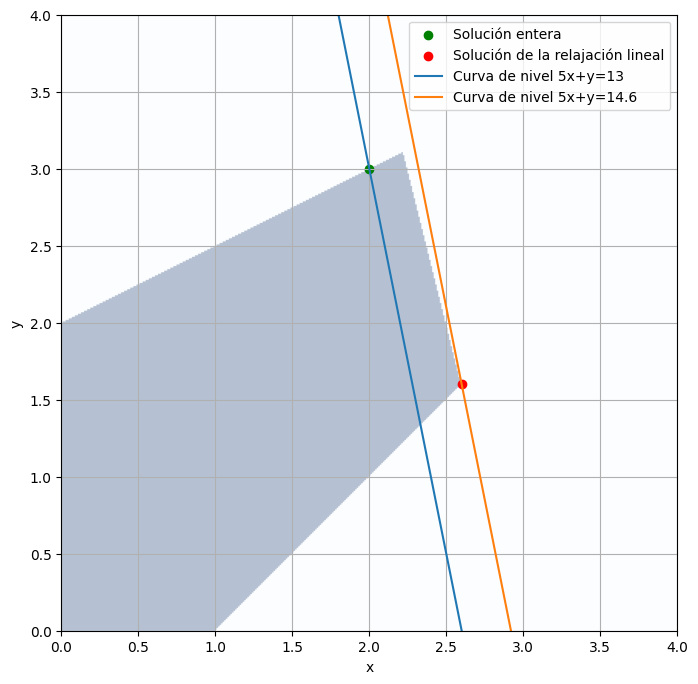

In [12]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
# Crear una malla de puntos
X, Y = np.meshgrid(x, y)

# restricción 1
r1 = (-X + 2 * Y <= 4)
# restricción 2
r2 = (X - Y <= 1)
# restriccion 3
r3 = (4 * X + Y <= 12)
# restriccion 4
r4 = (X >= 0)
# restriccion 5
r5 = (Y >= 0)

region = r1 & r2 & r3 & r4 & r5
plot_fun = True
plt.figure(figsize=(8, 8))
plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Blues", alpha=0.3)
puntos_dentro = [(2,3)]
plt.scatter(*zip(*puntos_dentro), color='green', marker='o', label='Solución entera')
plt.scatter(*zip(*[(2.6, 1.6)]), color='red', marker='o', label='Solución de la relajación lineal')

if plot_fun:
  for i in [13, 14.6]:
    plt.plot(x, (i - 5*x), label=f"Curva de nivel 5x+y={i}")
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.title("")
plt.grid(True)
plt.show()

2. Considere el siguiente grafo y suponga que se quiere ir del nodo 1 al nodo 6 mediante el camino más corto. Implemente y resuelva este problema haciendo uso de la librería `NetworkX` de Python. Comente sus resultados.

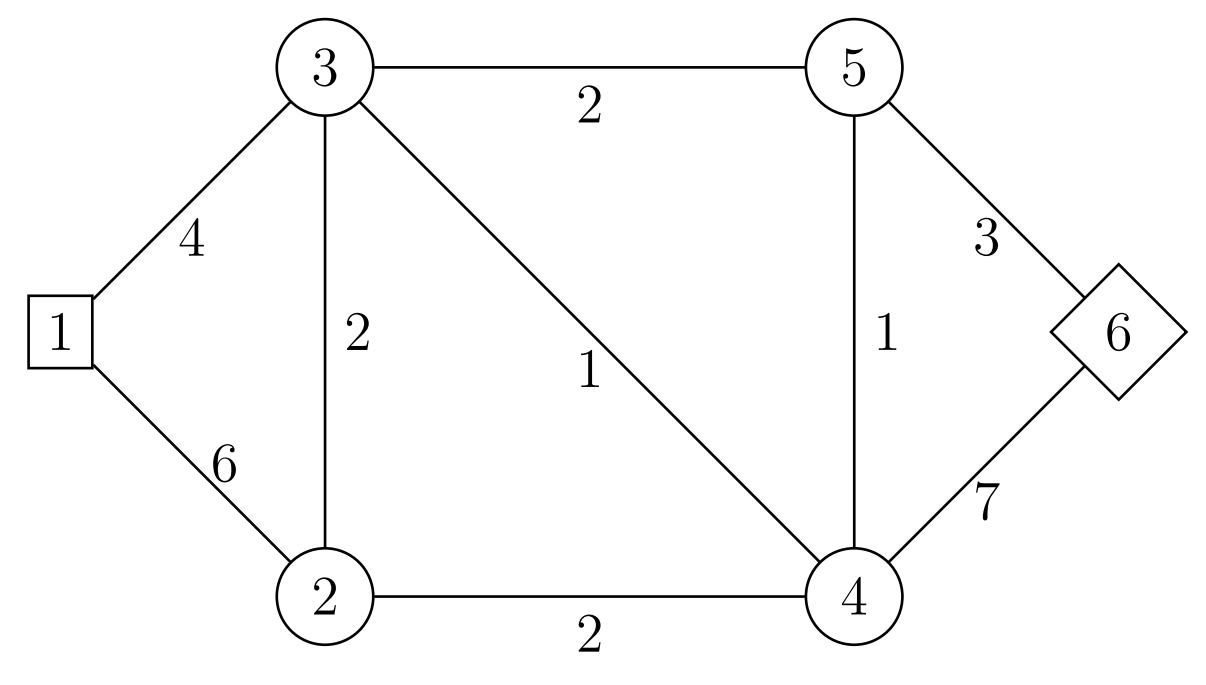

Existen diversos algoritmos de búsqueda para encontrar el camino más corto en un grafo. Uno de los algoritmos más utilizados es el algoritmo de
Dijkstra. Este algoritmo funciona tanto con grafos ponderados como no ponderados, es decir, donde las aristas tienen pesos que representan costos, distancias, tiempos, etc.

El algoritmo funciona manteniendo un conjunto de nodos cuya distancia mínima desde el origen ya ha sido determinada y otro conjunto de nodos cuya distancia aún no ha sido calculada. Inicialmente, la distancia al nodo de origen se establece en cero, mientras que las distancias a todos los demás nodos se consideran infinitas. En cada paso, el algoritmo selecciona el nodo con la distancia mínima provisional, actualiza las distancias de sus vecinos y marca el nodo como procesado. Este proceso se repite hasta que todos los nodos han sido procesados o hasta que se alcanza el nodo destino en caso de que solo se busque un camino específico.

Primero crearemos la matriz de adyacencia que representará al grado del problema, con los pesos de las aristas entre nodos

In [13]:
adj_matrix = np.array([
    [0, 6, 4, 0, 0, 0], # N1 conectado a N2 (peso 6) y N3 (peso 4)
    [6, 0, 2, 2, 0, 0], # N2 conectado a N1 (peso 6),  N3 (peso 2) y N4 (peso 2)
    [4, 2, 0, 1, 2, 0], # N3 conectado a N1 (peso 4),  N2 (peso 2), N4 (peso 1) y N5 (peso 2)
    [0, 2, 1, 0, 1, 7], # N4 conectado a N2 (peso 2),  N3 (peso 1), N5 (peso 1) y N6 (peso 7)
    [0, 0, 2, 1, 0, 3], # N5 conectado a N3 (peso 2),  N4 (peso 1) y N6 (peso 3)
    [0, 0, 0, 7, 3, 0] # N6 conectado a N4 (peso 7) y N5 (peso 3)
])
G = nx.from_numpy_array(adj_matrix)

En esta matriz, el valor de cero significa que no hay una arista que conecte entre dos nodos y hemos creado el grafo a partir de esta matriz con NetworkX

Podemos visuzalir nuestro grafo con NetworkX para verificar si ha sido codificado correctamente, esto lo hacemos llamando a NetworkX.draw donde se verán los nodos, las aristas y los pesos de cada una

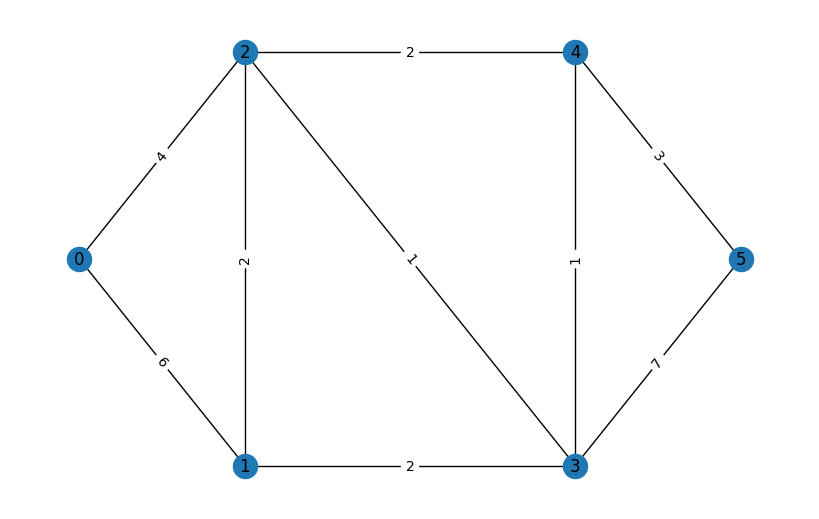

In [14]:
plt.figure(figsize=(8, 5))
pos = {0: np.array([-1.5, 0.5]),
       1: np.array([ 0.0, 0.0]),
       2: np.array([ 0.0, 1.0]),
       3: np.array([ 3.0, 0.0]),
       4: np.array([ 3.0, 1.0]),
       5: np.array([ 4.5, 0.5])}
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

Es importante recordar que en Python, las numeraciones comienzan en cero, y es por eso que vemos un "nodo 0", que en realidad es el nodo 1, el nodo 1, corresponde al nodo 2 y así sucesivamente. Esto no afecta ni al grafo ni al algoritmo, que podemos renombrar:

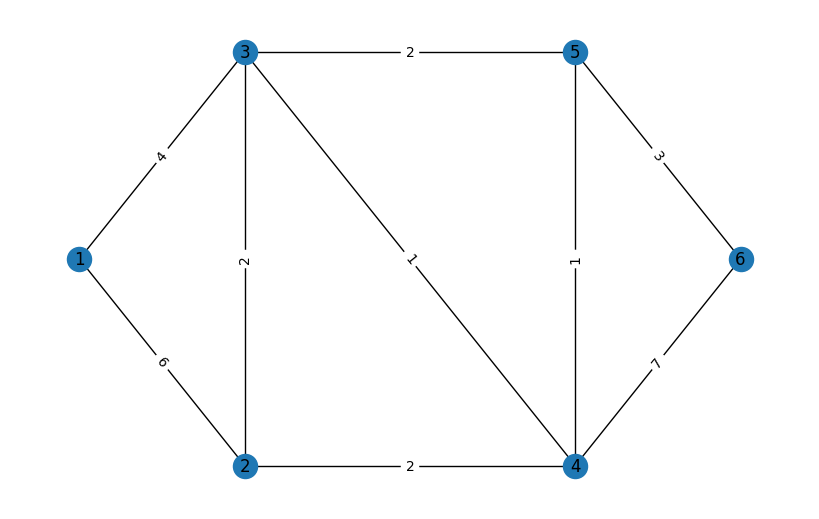

In [15]:
G = nx.relabel_nodes(G, {item: item + 1 for item in range(6)})
plt.figure(figsize=(8, 5))
pos = {1: np.array([-1.5, 0.5]),
       2: np.array([ 0.0, 0.0]),
       3: np.array([ 0.0, 1.0]),
       4: np.array([ 3.0, 0.0]),
       5: np.array([ 3.0, 1.0]),
       6: np.array([ 4.5, 0.5])}
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

Una vez renombrados, podemos continuar y aplicar el Algoritmo de Dijkstra utilizando `nx.shortest_path`

El camino más corto del nodo 1 al nodo 6 es: [1, 3, 5, 6]
La longitud del camino más corto es: 9


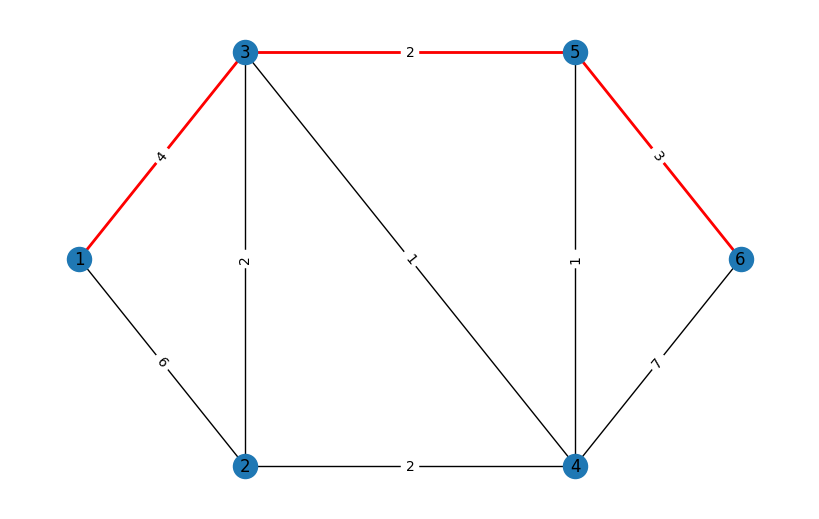

In [16]:
shortest_path = nx.shortest_path(G, source=1, target=6, weight='weight')
shortest_path_length = nx.shortest_path_length(G, source=1, target=6, weight='weight')
# Imprimimos el camino más corto y su longitud
print("El camino más corto del nodo 1 al nodo 6 es:", shortest_path)
print("La longitud del camino más corto es:", shortest_path_length)

# Dibujamos el grafo con la ruta del camino más corto resaltada
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edges(G, pos, edgelist=list(zip(shortest_path[:-1], shortest_path[1:])), edge_color="red", width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

Podemos ver que la solución es la esperada si vamos paso a paso recorriendo los nodos candidatos y su distancia:


1. Inicialización
- Nodo 1: 0
- Nodo 2: $\infty$
- Nodo 3: $\infty$
- Nodo 4: $\infty$
- Nodo 5: $\infty$
- Nodo 6: $\infty$

**Nodos por visitar: 1, 2, 3, 4, 5, 6**


2. Exploración

- Vecinos de nodo 1: Nodo 2, Nodo 3
**Distancias**

- Nodo 1: 0
- Nodo 2: 6
- Nodo 3: 4
- Nodo 4: $\infty$
- Nodo 5: $\infty$
- Nodo 6: $\infty$

**Nodos por visitar: 2, 3, 4, 5, 6**

2.1 Nodo Actual: 3 (por distancia más pequeña)

-  Vecinos de nodo 3: Nodo 1, Nodo 2, Nodo 4, Nodo 5

- Nodo 1: min(0, 4 + 4) = 0
- Nodo 2: min(6, 4 + 2) = 6
- Nodo 3: 4
- Nodo 4: min(∞, 4 + 1) = 5
- Nodo 5: min(∞, 4 + 2) = 6
- Nodo 6: $\infty$

**Nodos por visitar: 2, 4, 5, 6**

2.2 Nodo Actual: 4 (por distancia más pequeña)
- Vecinos de nodo 4: Nodo 2, Nodo 3, Nodo 5, Nodo 6

- Nodo 1: 0
- Nodo 2: min(6, 5 + 2) = 6
- Nodo 3: min(4, 5 + 1) = 4
- Nodo 4: 5
- Nodo 5: min(6, 5 + 1) = 6
- Nodo 6: min(\infty, 5 + 7) = 12

**Nodos por visitar: 2, 5, 6**

2.3 Nodo Actual: 2
- Vecinos de nodo 2: Nodo 1, Nodo 3, Nodo 4

- Nodo 1: min(0, 6 + 6) = 0
- Nodo 2: 6
- Nodo 3: min(4, 6 + 2) = 4
- Nodo 4: min(5, 6 + 2) = 5
- Nodo 5: 6
- Nodo 6: 12

**Nodos por visitar: 5 y 6**

2.4 Nodo Actual: 5
- Vecinos de nodo 5: Nodo 3, Nodo 4, Nodo 6

- Nodo 1: 0
- Nodo 2: 6
- Nodo 3: min(4, 6 + 2) = 4
- Nodo 4: min(5, 6 + 1) = 5
- Nodo 5: 6
- Nodo 6: min(12, 6 + 3) = 9

2.4 Último nodo: 6

Ya se visitaron todos los vecinos.


3. Exit


Con el algoritmo de Dijkstra pudimos obtener el costo de los caminos, determinar el más corto basado en costo que es de 9 y es consistente con la gráfica, donde el camino está recorriendo los nodos 1, 3, 5 y 6.

3. Considere el siguiente grafo:

suponga que se quiere mandar el máximo flujo del nodo 1 al nodo 7. Implemente y resuelva este problema. Comente sus resultados

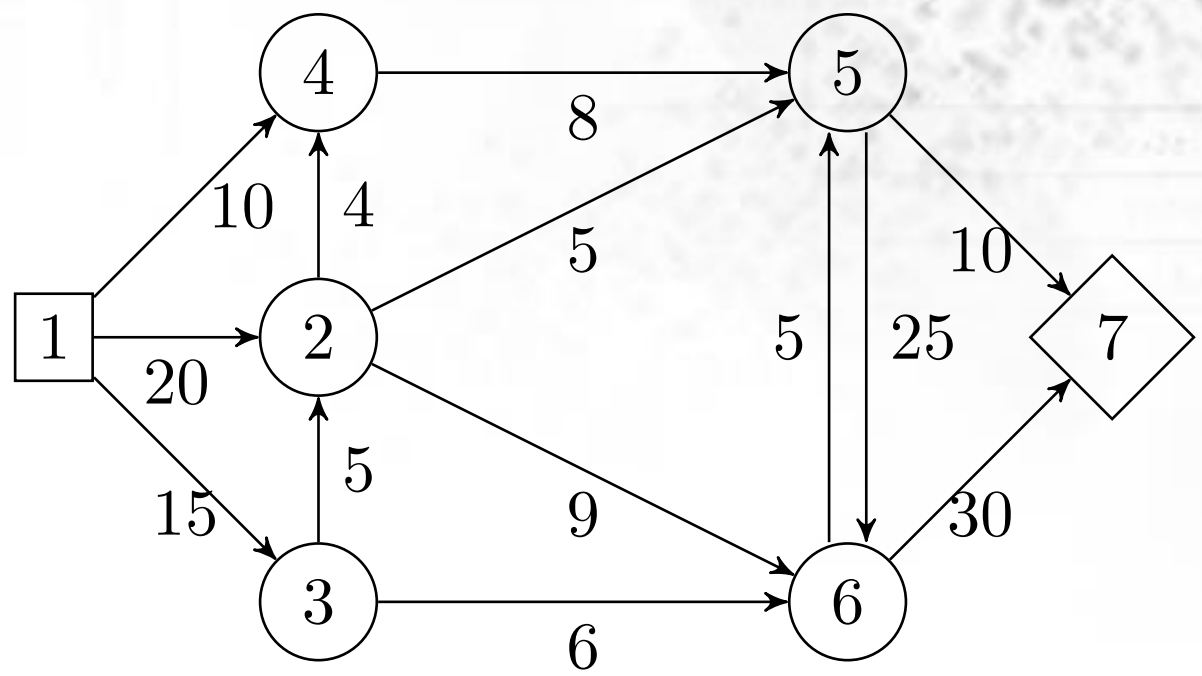


En este caso no se utiliza el algoritmo de Dijkstra si no el algoritmo de Ford-Fulkerson, donde se busca el flujo máximo en un grafo mediante caminos aumentantes y el ajuste del flujo en las aristas:

El algoritmo comienza inicializando el flujo en todas las aristas a cero. Luego, en cada iteración, busca un **camino de aumento** en la **red residual**, que es una versión modificada del grafo original donde las capacidades de las aristas se ajustan según el flujo actual. Si se encuentra un camino de aumento, el flujo se incrementa a lo largo de ese camino en la cantidad máxima posible (determinada por la capacidad residual mínima en el camino). Este proceso se repite hasta que no se puedan encontrar más caminos de aumento, lo que indica que se ha alcanzado el flujo máximo.

Comenzaremos codificando el grafo dirigido con NetworkX:

In [17]:
edges = {(1, 2): 20,
         (1, 3): 15,
         (1, 4): 10,
         (2, 4): 4,
         (2, 5): 5,
         (2, 6): 9,
         (3, 2): 5,
         (3, 6): 6,
         (4, 5): 8,
         (5, 6): 25,
         (5, 7): 10,
         (6, 5): 5,
         (6, 7): 30,
         (7, 5): 10,
         (7, 6): 30 }
# creamos un objeto para el grafo dirigido
G = nx.DiGraph()
# iteramos sobre las aristas y las agregamos al grafo junto con su capacidad
for (u, v), capacity in edges.items():
  G.add_edge(u, v, capacity=capacity)

Podemos graficar este grafo, de manera análoga al anterior:

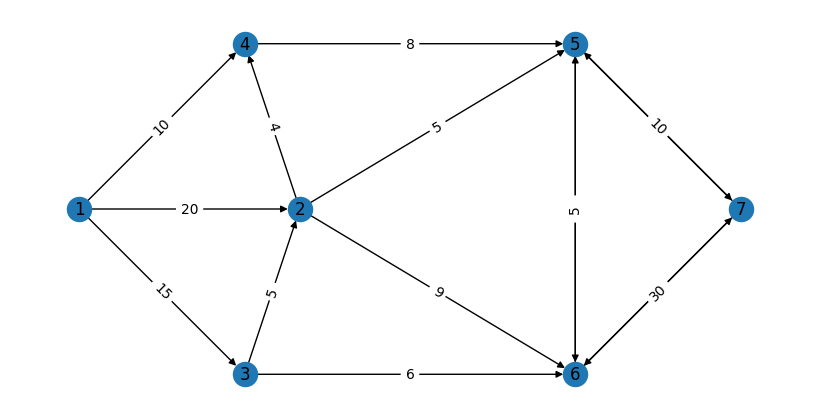

In [18]:
pos = {1: [-1.5, 0.5],
       2: [0.5, 0.5],
       3: [0.0, 0.0],
       4: [0.0, 1.0],
       5: [3.0, 1.0],
       6: [3.0, 0.0],
       7: [4.5, 0.5]}
plt.figure(figsize=(8, 4))
nx.draw(G, pos, with_labels=True, arrows=True)
labels = nx.get_edge_attributes(G, "capacity")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

Una vez corroborada que la codificación es correcta, procederemos a solucionar el problema del flujo máximo

In [19]:
# buscaremos el flujo máximo del nodo 1 al nodo 7
flow_value, flow_dict = nx.maximum_flow(G, 1, 7)

print("El valor del flujo máximo del nodo 1 al nodo 7 es:", flow_value)

El valor del flujo máximo del nodo 1 al nodo 7 es: 28


Hemos encontrado el flujo máximo para el problema, ahora solo falta describir la ruta y mostrarla sobre el grafo, para este objetivo haremos:

In [20]:
def find_flow_path(flow_dict, source, target):
  path = [] # Lista para almacenar la ruta del flujo máximo
  current_node = source # Comenzamos en el nodo de origen
  while current_node != target: # Continuamos hasta llegar al nodo de destino
    for next_node, flow in flow_dict[current_node].items():
      if flow > 0: # Si hay flujo en la arista, la agregamos a la ruta
        path.append((current_node, next_node))
        current_node = next_node # Nos movemos al siguiente nodo
        break
  return path

La función `find_flow_path` tiene como objetivo **encontrar una ruta de flujo** desde el nodo de origen (`source`) hasta el nodo de destino (`target`) en el grafo representado por un diccionario de flujos (`flow_dict`).

La función devuelve una lista de tuplas `(u, v)` que representan las aristas que forman la ruta desde el nodo de origen hasta el nodo de destino.

**Entradas**:
   - `flow_dict`: Un diccionario que representa el flujo actual en el grafo. Cada clave es un nodo, y su valor es otro diccionario que indica los flujos hacia los nodos adyacentes. Por ejemplo, `flow_dict[u][v]` representa el flujo que va desde el nodo `u` al nodo `v`.

   - `source`: El nodo de origen desde donde comienza la búsqueda de la ruta.

   - `target`: El nodo de destino al que se quiere llegar.

**Funcionamiento**
   - La función comienza en el nodo de origen (`current_node = source`) y explora los nodos adyacentes.

   - Para cada nodo adyacente (`next_node`), verifica si hay flujo positivo (`flow > 0`) en la arista que los conecta.

   - Si hay flujo, agrega la arista `(current_node, next_node)` a la lista `path` y se mueve al siguiente nodo (`current_node = next_node`).

   - Este proceso se repite hasta que se alcanza el nodo de destino (`target`).

Encontraremos la ruta apoyados de esta función y la graficaremos sobre el grafo:

La ruta del flujo máximo del nodo 1 al nodo 7 es: [(1, 2), (2, 4), (4, 5), (5, 6), (6, 7)]


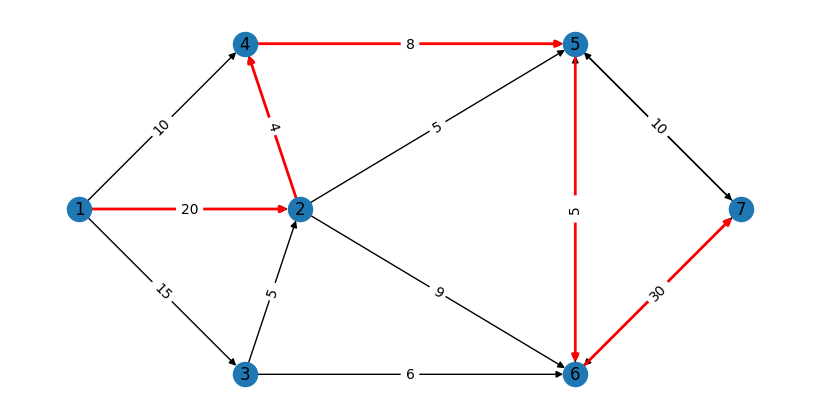

In [21]:
flow_path = find_flow_path(flow_dict, 1, 7)
print("La ruta del flujo máximo del nodo 1 al nodo 7 es:", flow_path)

plt.figure(figsize=(8, 4))
nx.draw(G, pos, with_labels=True, arrows=True)
# Resaltamos la ruta del flujo máximo en rojo
nx.draw_networkx_edges(G, pos, edgelist=flow_path, edge_color="red", width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

De esta forma, el valor del flujo en cada arista se determina iterativamente utilizando el algoritmo de flujo máximo, encontrando los caminos aumentantes y ajustando los flujos en las aristas. El valor del flujo máximo es calculado como la suma del flujo que sale del nodo fuente.